## Scaling Analysis of Introgressed/Depleted sequences

In [1]:
import os
from Bio import SeqIO
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy
from scipy import signal 

In [2]:
intr_file = '../ubuntu/data/hg19_intr_clean.fa'
depl_file = '../ubuntu/data/hg19_depl_clean.fa'

a = 0
intr_seqs = []
depl_seqs = []
for intr, depl in zip(SeqIO.parse(intr_file, 'fasta'), SeqIO.parse(depl_file, 'fasta')):
    s_intr = str(intr.seq)
    s_depl = str(depl.seq)
    if s_intr.count('A')>0 and s_intr.count('C')>0 and s_intr.count('G')>0 and s_intr.count('T')>0 and \
    s_depl.count('A')>0 and s_depl.count('C')>0 and s_depl.count('G')>0 and s_depl.count('T')>0:
        intr_seqs.append(s_intr)
        depl_seqs.append(s_depl)
    a = a + 1
    if a%10000 == 0:
        print('Finished ' + str(a) + ' entries')


Finished 10000 entries
Finished 20000 entries
Finished 30000 entries
Finished 40000 entries
Finished 50000 entries
Finished 60000 entries
Finished 70000 entries


18724


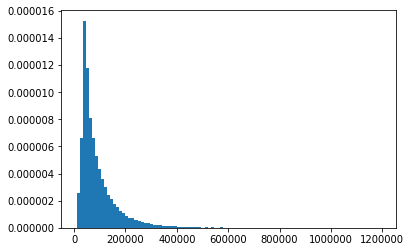

In [3]:
lenghts = [len(intr_seqs[i]) for i in range(len(intr_seqs))]
plt.hist(lenghts, density=True, bins=100)
plt.show()

In [4]:
def Corr(s,r,alphabet):
    bases = ['A','C','T','G']
    C = 0
    freq = 0
    s1 = s[:-r]
    s2 = s[r:]
    long_dist = np.equal(s1,s2)
    long_dist = np.sum([int(long_dist[i]) for i in range(len(long_dist))])/len(long_dist)
    for i in bases:
        freq += (alphabet[i][0]/len(s))**2
    C = long_dist -freq
    return C

In [5]:
def smooth(y, box_pts):
        box = np.ones(box_pts)/box_pts
        y_smooth = np.convolve(y, box, mode='same')
        return y_smooth
def scaling(x,a,c):
    return c*x**(-a)

In [ ]:
np.random.shuffle(intr_seqs)
from os import system, name 
intr_scaling_10 = []
intr_c = []
count = 0
for s in intr_seqs[0:5000]:
    
    count += 1
        
    change = {'A':[0], 'C':[1], 'T':[2], 'G':[3]}
    dna = []
    for i in s:
        dna.append(change[i][0])
        
    alphabet = {'A':[0], 'C':[0], 'T':[0], 'G':[0]}
    for i in s:
        alphabet[i][0] += 1
        
    r = np.linspace(10,100,100)
    cr = [Corr(dna,int(ri),alphabet) for ri in r]
    cr = smooth(cr,10)
    try:
        gamma = scipy.optimize.curve_fit(scaling,r[n:-m],cr[n:-m])[0]
        intr_scaling_10.append(gamma[0])
        intr_c.append(gamma[1])
    except:
        intr_scaling_10.append(-1)
    print('{}th Sequence'.format(count), end='\r' ,flush=True)

In [ ]:
np.random.shuffle(depl_seqs)
from os import system, name 
depl_scaling_10 = []
depl_c = []
count = 0
for s in depl_seqs[0:5000]:
    
    count += 1
        
    change = {'A':[0], 'C':[1], 'T':[2], 'G':[3]}
    dna = []
    for i in s:
        dna.append(change[i][0])
        
    alphabet = {'A':[0], 'C':[0], 'T':[0], 'G':[0]}
    for i in s:
        alphabet[i][0] += 1
        
    r = np.linspace(10,100,100)
    cr = [Corr(dna,int(ri),alphabet) for ri in r]
    cr = smooth(cr,10)
    try:
        gamma = scipy.optimize.curve_fit(scaling,r[n:-m],cr[n:-m])[0]
        depl_scaling_10.append(gamma[0])
        depl_c.append(gamma[1])
    except:
        depl_scaling_10.append(-1)
    print('{}th Sequence'.format(count), end='\r' ,flush=True)

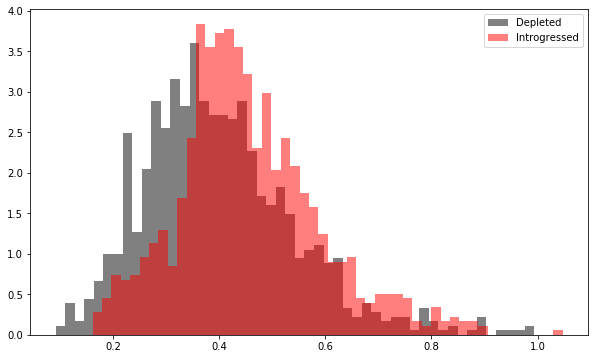

In [15]:
exponents_intr = [i for i in intr_scaling_10 if(i>=0)]
exponents_depl = [i for i in depl_scaling_10 if(i>=0)]
plt.figure(figsize=(10,6))
plt.hist(exponents_depl, bins = 50, density = True, color = 'grey', alpha=1,label='Depleted')
plt.hist(exponents_intr, bins = 50, density = True,color = 'red', alpha=0.5, label='Introgressed')
plt.legend()
plt.show()

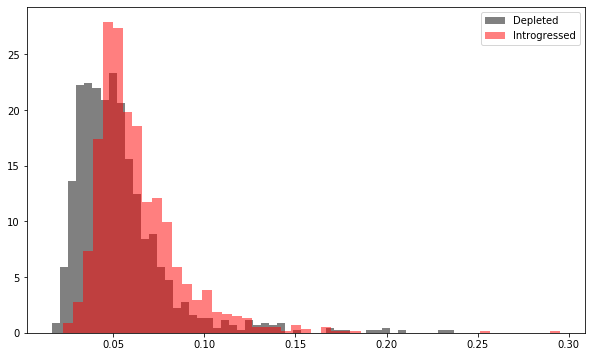

In [14]:
plt.figure(figsize=(10,6))
plt.hist(depl_c, bins = 50, density = True, color = 'grey', alpha=1,label='Depleted')
plt.hist(intr_c, bins = 50, density = True,color = 'red', alpha=0.5, label='Introgressed')
plt.legend()
plt.show()

In [16]:
f = open("histo_10_100_depl.txt", "w")
f.write(str(exponents_depl))
f.close()

f = open("histo_10_100_intr.txt", "w")
f.write(str(exponents_intr))
f.close()

f = open("c_depl.txt", "w")
f.write(str(depl_c))
f.close()

f = open("c_intr.txt", "w")
f.write(str(intr_c))
f.close()

In [14]:
from os import system, name 
intr_scaling = []
count = 0
for s in intr_seqs[0:500]:
    
    count += 1
        
    change = {'A':[0], 'C':[1], 'T':[2], 'G':[3]}
    dna = []
    for i in s:
        dna.append(change[i][0])
        
    alphabet = {'A':[0], 'C':[0], 'T':[0], 'G':[0]}
    for i in s:
        alphabet[i][0] += 1
        
    r = np.linspace(100,1000,100)
    cr = [Corr(dna,int(ri),alphabet) for ri in r]
    cr = smooth(cr,10)
    try:
        gamma = scipy.optimize.curve_fit(scaling,r[n:-m],cr[n:-m])[0]
        intr_scaling.append(gamma[0])
    except:
        intr_scaling.append(-1)
    print('{}th Sequence'.format(count), end='\r' ,flush=True)

In [15]:
from os import system, name 
depl_scaling = []
count = 0
for s in depl_seqs[0:500]:
    
    count += 1
        
    change = {'A':[0], 'C':[1], 'T':[2], 'G':[3]}
    dna = []
    for i in s:
        dna.append(change[i][0])
        
    alphabet = {'A':[0], 'C':[0], 'T':[0], 'G':[0]}
    for i in s:
        alphabet[i][0] += 1
        
    r = np.linspace(100,1000,100)
    cr = [Corr(dna,int(ri),alphabet) for ri in r]
    cr = smooth(cr,10)
    try:
        gamma = scipy.optimize.curve_fit(scaling,r[n:-m],cr[n:-m])[0]
        depl_scaling.append(gamma[0])
    except:
        depl_scaling.append(-1)
    print('{}th Sequence'.format(count), end='\r' ,flush=True)

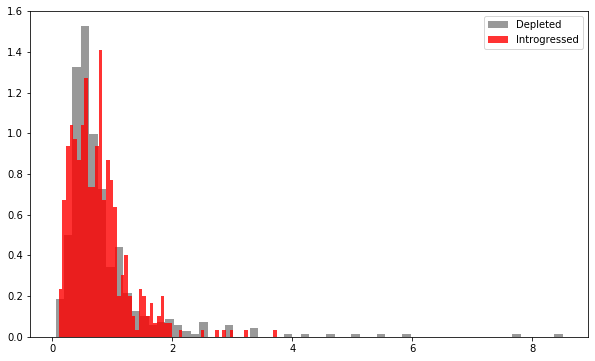

In [19]:
np.array(depl_scaling).reshape(len(depl_scaling))
exponents_intr = [i for i in intr_scaling if(i>=0 )]
exponents_depl = [i for i in depl_scaling if(i>=0 )]
plt.figure(figsize=(10,6))
plt.hist(exponents_depl, bins = 60, density = True, color = 'grey', alpha=0.8,label='Depleted')
plt.hist(exponents_intr, bins = 60, density = True,color = 'red', alpha=0.8, label='Introgressed')
plt.legend()
plt.show()

### Test LSTM architecture on Real Data

In [3]:
import tensorflow as tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout, concatenate, SpatialDropout1D
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, LSTM, Bidirectional, Attention
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import confusion_matrix
if tensorflow.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tensorflow.test.gpu_device_name()))
else:
    print("Please install GPU version of tensorflow")

Default GPU Device: /device:GPU:0


In [7]:
#model = tensorflow.keras.models.load_model('4bases_model')
model = tensorflow.keras.models.load_model('4bases_nikolay')

In [8]:
exp_intr = np.fromfile('histo_10_100_intr.txt', sep = ",")
exp_depl = np.fromfile('histo_10_100_depl.txt', sep = ",")

mean_intr = np.mean(exp_intr)
mean_depl = np.mean(exp_depl)

c_intr = np.fromfile('c_intr.txt', sep = ",")
c_depl = np.fromfile('c_depl.txt', sep = ",")

mean_c_intr = np.mean(c_intr)
mean_c_depl = np.mean(c_depl)
print(mean_c_intr)
print(mean_c_depl)

0.06346758483847653
0.05350930434735322


In [9]:
s = 0.0001
#mask_intr = np.logical_and(c_intr>mean_c_intr-s, c_intr<mean_c_intr+s)
#mask_depl = np.logical_and(c_depl>mean_c_depl-s,c_depl<mean_c_depl+s)

#mask_intr = np.logical_and(exp_intr>mean_intr-s, exp_intr<mean_intr+s)
#mask_depl = np.logical_and(exp_depl>mean_depl-s, exp_depl<mean_depl+s)
#idx_intr = np.where(mask_intr == True)
#idx_depl = np.where(mask_depl == True)

human = [depl_seqs[i] for i in range(1000)]
neanderthal = [intr_seqs[i] for i in range(1000)]

print(len(human))
print(len(neanderthal))

print(len(human[0]))
print(len(neanderthal[0]))

1000
1000
35949
40052


In [10]:
print(c_intr[0])
print(c_depl[0])

print(exp_intr[0])
print(exp_depl[0])

0.045979437238489566
0.07568838960430695
0.1818370369743298
0.5185596205080104


In [11]:
intr_cm = []
depl_cm = []

quality_intr= []
quality_depl = []
for k in range(min(len(human),len(neanderthal))):
    H_DNA = human[k]
    N_DNA = neanderthal[k]

    H_DNA = [i for i in H_DNA]
    N_DNA = [i for i in N_DNA]

    sentence_length= 5000
    word_length = 5

    H_DNA = np.array(H_DNA[0:(len(H_DNA)//sentence_length)*sentence_length])
    N_DNA = np.array(N_DNA[0:(len(N_DNA)//sentence_length)*sentence_length])

    #divide in sentences
    H_DNA_s = np.array(np.split(H_DNA, len(H_DNA)//sentence_length))
    N_DNA_s = np.array(np.split(N_DNA, len(N_DNA)//sentence_length))

    #divide in words
    H_DNA_w = np.array(np.split(H_DNA_s, sentence_length//word_length, axis=1  ))
    N_DNA_w = np.array(np.split(N_DNA_s, sentence_length//word_length , axis=1 ))

    #make words strings.
    Human_DNA = np.array([[''.join(H_DNA_w[i,j]) for i in range(H_DNA_w.shape[0]) ]for 
                      j in range(H_DNA_w.shape[1])])
    #make words strings.
    Neanderthal_DNA = np.array([[''.join(N_DNA_w[i,j]) for i in range(N_DNA_w.shape[0]) ]for 
                      j in range(N_DNA_w.shape[1])])

    depl_texts = [' '.join(Human_DNA[i,:]) for i in range(Human_DNA.shape[0])]
    intr_texts = [' '.join(Neanderthal_DNA[i,:]) for i in range(Neanderthal_DNA.shape[0])]

    merge_texts = intr_texts + depl_texts
    labels = list(np.ones(len(intr_texts))) + list(np.zeros(len(depl_texts)))

    import warnings
    warnings.filterwarnings('ignore')

    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(merge_texts)

    encoded_docs = tokenizer.texts_to_sequences(merge_texts)
    max_length = max([len(s.split()) for s in merge_texts])
    X = pad_sequences(encoded_docs, maxlen = max_length, padding = 'post')
    predicted_labels = model.predict(X)
    cm = confusion_matrix(labels, [np.round(i[0]) for i in predicted_labels])
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    
    if(cm[1][1] >= 0.7):
        quality_intr.append(k)
    if(cm[0][0] >= 0.7):
        quality_depl.append(k)
    intr_cm.append(cm[1][1])
    depl_cm.append(cm[0][0])
    print('{}th Couple'.format(k+1), end='\r' ,flush=True)

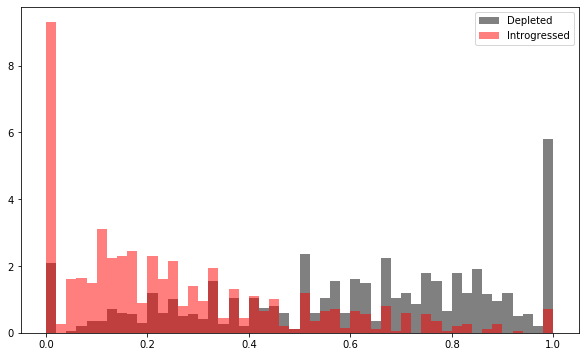

In [12]:
plt.figure(figsize=(10,6))
plt.hist(depl_cm, bins = 50, density = True, color = 'grey', alpha=1,label='Depleted')
plt.hist(intr_cm, bins = 50, density = True,color = 'red', alpha=0.5, label='Introgressed')
plt.legend()
plt.show()

In [13]:
accuracy_intr = np.mean(intr_cm)
accuracy_depl = np.mean(depl_cm)
print('Accuracy Depleted: {}%'.format(accuracy_depl*100))
print('Accuracy Introgressed: {}%'.format(accuracy_intr*100))

Accuracy Depleted: 60.29970891767441%
Accuracy Introgressed: 24.99429572891789%


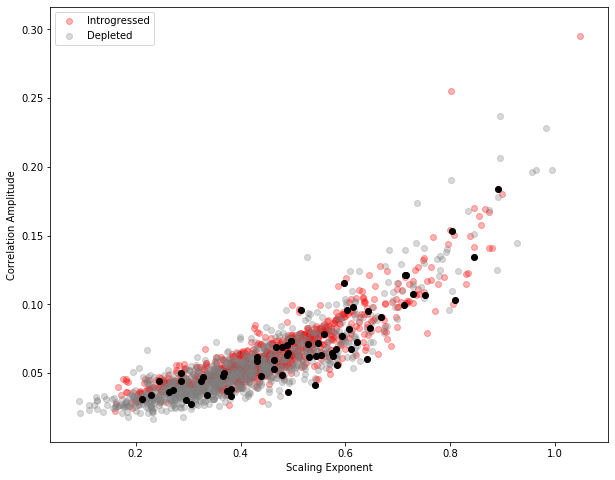

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(exp_intr, c_intr, color = 'red', label = 'Introgressed', alpha = 0.3)
plt.scatter(exp_depl, c_depl, color = 'grey', label = 'Depleted',alpha = 0.3)
plt.scatter(exp_intr[quality_intr], 
            c_intr[quality_intr], color = 'black')
#plt.scatter(exp_depl[quality_depl], 
#            c_depl[quality_depl], color = 'purple')
plt.xlabel('Scaling Exponent')
plt.ylabel('Correlation Amplitude')
plt.legend()
plt.show()